/tmp/ipykernel_561999/2198680907.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_561999/2198680907.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(


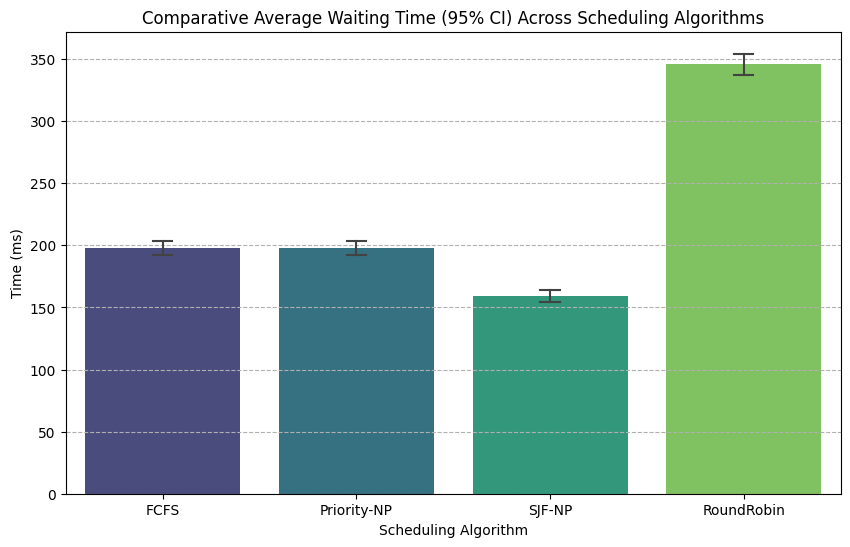

/tmp/ipykernel_561999/2198680907.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


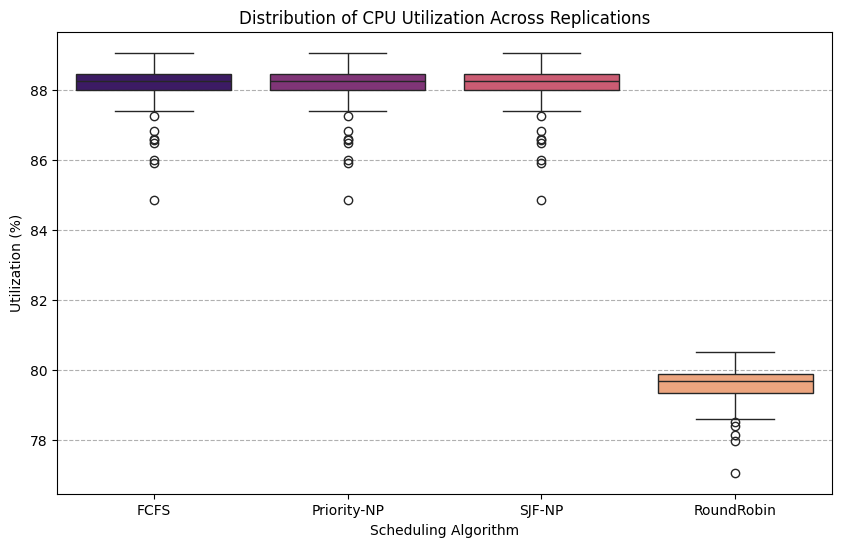

/tmp/ipykernel_561999/2198680907.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


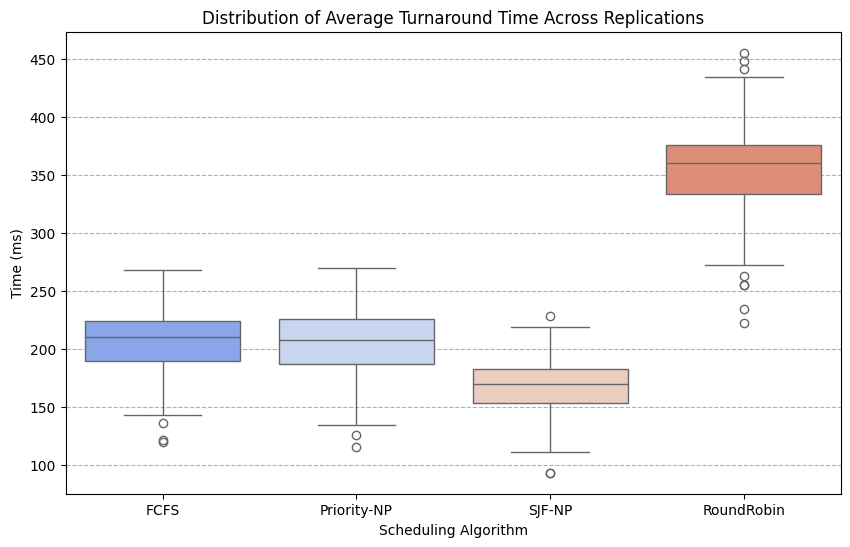

/tmp/ipykernel_561999/2198680907.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


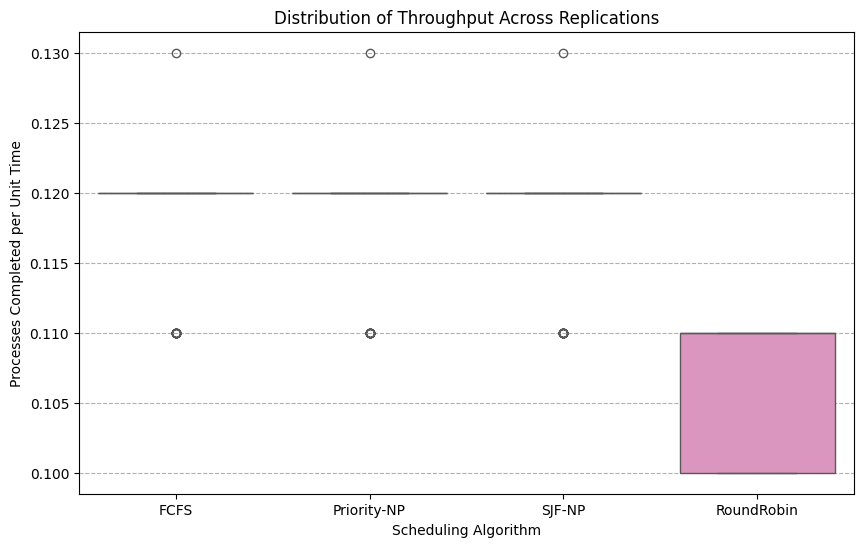

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data generated by the Java simulation
df = pd.read_csv('simulation_results.csv')

# --- PLOT 1: Average Waiting Time with 95% Confidence Intervals (CI) ---

# Filter for the specific metric
wait_df = df[df['Metric'] == 'AvgWaitingTime']

plt.figure(figsize=(10, 6))
# Create a bar plot, with error bars representing the 95% CI 
# (Seaborn's barplot automatically computes mean and CI)
sns.barplot(
    x='Algorithm', 
    y='Value', 
    data=wait_df, 
    capsize=0.1, 
    errwidth=1.5,
    palette="viridis"
)
plt.title('Comparative Average Waiting Time (95% CI) Across Scheduling Algorithms')
plt.ylabel('Time (ms)')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()


# --- PLOT 2: CPU Utilization Comparison (Box Plot) ---

# Filter for CPU Utilization
cpu_df = df[df['Metric'] == 'CPUUtilization']

plt.figure(figsize=(10, 6))
# Box plots show the distribution of results across the 30 replications
sns.boxplot(
    x='Algorithm', 
    y='Value', 
    data=cpu_df, 
    palette="magma"
)
plt.title('Distribution of CPU Utilization Across Replications')
plt.ylabel('Utilization (%)')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()

# --- PLOT 3: Turnaround Time Comparison (Box Plot) ---
turnaround_df = df[df['Metric'] == 'AvgTurnaroundTime']

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Algorithm',
    y='Value',
    data=turnaround_df,
    palette="coolwarm"
)
plt.title('Distribution of Average Turnaround Time Across Replications')
plt.ylabel('Time (ms)')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()

# --- PLOT 4: Throughput Comparison (Box Plot) ---
throughput_df = df[df['Metric'] == 'Throughput']
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Algorithm',
    y='Value',
    data=throughput_df,
    palette="Set2"
)
plt.title('Distribution of Throughput Across Replications')
plt.ylabel('Processes Completed per Unit Time')
plt.xlabel('Scheduling Algorithm')
plt.grid(axis='y', linestyle='--')
plt.show()

In [6]:
# Group by Algorithm and Metric, compute descriptives
descriptives = df.groupby(['Algorithm', 'Metric'])['Value'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()

# Print or save to CSV for report
print(descriptives)
descriptives.to_csv('descriptive_stats.csv', index=False)


      Algorithm             Metric      mean   median        std     min  \
0          FCFS  AvgTurnaroundTime  205.5627  210.285  29.364768  119.96   
1          FCFS     AvgWaitingTime  198.0601  202.890  29.302352  112.33   
2          FCFS     CPUUtilization   88.1081   88.260   0.639889   84.85   
3          FCFS         Throughput    0.1185    0.120   0.003860    0.11   
4   Priority-NP  AvgTurnaroundTime  205.3739  207.635  29.726922  114.91   
5   Priority-NP     AvgWaitingTime  197.8713  200.045  29.671688  107.28   
6   Priority-NP     CPUUtilization   88.1081   88.260   0.639889   84.85   
7   Priority-NP         Throughput    0.1185    0.120   0.003860    0.11   
8    RoundRobin  AvgTurnaroundTime  353.1954  359.780  44.814746  222.10   
9    RoundRobin     AvgWaitingTime  345.6928  352.115  44.737167  214.99   
10   RoundRobin     CPUUtilization   79.5700   79.685   0.533896   77.06   
11   RoundRobin         Throughput    0.1065    0.110   0.004794    0.10   
12       SJF

In [7]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For each metric, perform ANOVA
metrics = df['Metric'].unique()
for metric in metrics:
    metric_df = df[df['Metric'] == metric]
    
    # ANOVA: Test if means differ by Algorithm
    groups = [metric_df[metric_df['Algorithm'] == alg]['Value'] for alg in metric_df['Algorithm'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"{metric} ANOVA: F={f_val:.2f}, p={p_val:.4f}")  # If p < 0.05, differences are significant
    
    # Post-hoc: Tukey's HSD for pairwise
    tukey = pairwise_tukeyhsd(endog=metric_df['Value'], groups=metric_df['Algorithm'], alpha=0.05)
    print(tukey)


AvgWaitingTime ANOVA: F=619.82, p=0.0000
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower     upper   reject
-----------------------------------------------------------------
       FCFS Priority-NP  -0.1888   1.0  -12.2695   11.8919  False
       FCFS  RoundRobin 147.6327   0.0   135.552  159.7134   True
       FCFS      SJF-NP -39.0653   0.0   -51.146  -26.9846   True
Priority-NP  RoundRobin 147.8215   0.0  135.7408  159.9022   True
Priority-NP      SJF-NP -38.8765   0.0  -50.9572  -26.7958   True
 RoundRobin      SJF-NP -186.698   0.0 -198.7787 -174.6173   True
-----------------------------------------------------------------
AvgTurnaroundTime ANOVA: F=617.44, p=0.0000
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
       FCFS Priority-NP  -0.1888   1.0 -12.2928  11.9152  False